In [1]:
#import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [6]:
#Import request
import requests
#Import weather API Key.
from config import weather_api_key

In [7]:
#Starting URL for Weather map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
#Loop through all the cities in the list.
for i, city in enumerate(cities):
    #Group cities in sets of 50 for logging purposes.
    if (i %50==0 and i>=50):
        set_count +=1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url+ "&q=" + city.replace(" ","+")
        # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | fairbanks
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | marzuq
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | port-gentil
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | nishihara
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | elk plain
Processing Record 16 of Set 1 | kununurra
Processing Record 17 of Set 1 | zhicheng
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | deputatskiy
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | dedza
Processing Record 22 of Set 1 | nizhniy kuranakh
P

Processing Record 37 of Set 4 | novouzensk
Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | honavar
Processing Record 40 of Set 4 | bagdarin
Processing Record 41 of Set 4 | pinotepa nacional
Processing Record 42 of Set 4 | nizhnyaya omka
Processing Record 43 of Set 4 | olafsvik
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | beckley
Processing Record 47 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 4 | surt
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | eureka
Processing Record 1 of Set 5 | yerofey pavlovich
Processing Record 2 of Set 5 | tocopilla
Processing Record 3 of Set 5 | murray bridge
Processing Record 4 of Set 5 | zaraza
Processing Record 5 of Set 5 | yakeshi
Processing Record 6 of Set 5 | praya
Processing Record 7 of Set 5 | honningsvag
Processing Record 8 of Set 5 | kaele
Processing Record 9 of Set 5 | ouro preto do oeste


Processing Record 26 of Set 8 | fethiye
Processing Record 27 of Set 8 | grajau
Processing Record 28 of Set 8 | moron
Processing Record 29 of Set 8 | port keats
Processing Record 30 of Set 8 | xihe
Processing Record 31 of Set 8 | harboore
Processing Record 32 of Set 8 | tarauaca
Processing Record 33 of Set 8 | mokhsogollokh
Processing Record 34 of Set 8 | meulaboh
Processing Record 35 of Set 8 | tadine
Processing Record 36 of Set 8 | yerbogachen
Processing Record 37 of Set 8 | hokitika
Processing Record 38 of Set 8 | poum
Processing Record 39 of Set 8 | odweyne
Processing Record 40 of Set 8 | loreto
Processing Record 41 of Set 8 | excelsior springs
Processing Record 42 of Set 8 | vardo
Processing Record 43 of Set 8 | pangody
Processing Record 44 of Set 8 | lavrentiya
Processing Record 45 of Set 8 | gunjur
Processing Record 46 of Set 8 | taltal
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | gizo
Processing Record 49 of Set 8 | talaya
Processing Record 50 of Set 8 | 

Processing Record 16 of Set 12 | carndonagh
Processing Record 17 of Set 12 | mairi
Processing Record 18 of Set 12 | mahajanga
Processing Record 19 of Set 12 | winnemucca
Processing Record 20 of Set 12 | trelew
Processing Record 21 of Set 12 | evensk
Processing Record 22 of Set 12 | bontang
Processing Record 23 of Set 12 | skelleftea
Processing Record 24 of Set 12 | dali
Processing Record 25 of Set 12 | bukachacha
Processing Record 26 of Set 12 | morros
Processing Record 27 of Set 12 | punta alta
Processing Record 28 of Set 12 | adjumani
Processing Record 29 of Set 12 | lincoln
Processing Record 30 of Set 12 | kirensk
Processing Record 31 of Set 12 | manacapuru
Processing Record 32 of Set 12 | teahupoo
Processing Record 33 of Set 12 | eskil
Processing Record 34 of Set 12 | reconquista
Processing Record 35 of Set 12 | saint simons
Processing Record 36 of Set 12 | tarrafal
Processing Record 37 of Set 12 | finschhafen
Processing Record 38 of Set 12 | birao
Processing Record 39 of Set 12 | 

In [10]:
len(city_data)

583

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,65,40,26.46,AR,2021-04-08 17:02:08
1,Hithadhoo,-0.6000,73.0833,83.53,67,23,14.18,MV,2021-04-08 17:02:08
2,Torbay,47.6666,-52.7314,43.00,100,90,18.41,CA,2021-04-08 17:02:09
3,Saskylakh,71.9167,114.0833,-10.23,99,100,6.51,RU,2021-04-08 17:02:09
4,Fairbanks,64.8378,-147.7164,8.01,85,90,6.91,US,2021-04-08 17:00:18
5,Jamestown,42.0970,-79.2353,71.60,43,1,9.22,US,2021-04-08 16:57:39
6,Marzuq,14.4000,46.4667,71.42,36,6,6.85,YE,2021-04-08 17:02:10
7,Hobart,-42.8794,147.3294,55.40,62,90,11.50,AU,2021-04-08 17:02:10
8,Port-Gentil,-0.7193,8.7815,86.00,74,20,13.80,GA,2021-04-08 17:02:10
9,Puerto Ayora,-0.7393,-90.3518,84.20,70,20,13.80,EC,2021-04-08 17:02:11


In [12]:
new_column_order= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-04-08 17:02:08,-54.8000,-68.3000,44.60,65,40,26.46
1,Hithadhoo,MV,2021-04-08 17:02:08,-0.6000,73.0833,83.53,67,23,14.18
2,Torbay,CA,2021-04-08 17:02:09,47.6666,-52.7314,43.00,100,90,18.41
3,Saskylakh,RU,2021-04-08 17:02:09,71.9167,114.0833,-10.23,99,100,6.51
4,Fairbanks,US,2021-04-08 17:00:18,64.8378,-147.7164,8.01,85,90,6.91
...,...,...,...,...,...,...,...,...,...
578,Iquique,CL,2021-04-08 17:05:31,-20.2208,-70.1431,69.80,60,40,11.50
579,Polunochnoye,RU,2021-04-08 17:05:31,60.8697,60.4153,34.03,98,100,6.15
580,Traverse City,US,2021-04-08 17:05:32,44.7631,-85.6206,77.00,41,90,11.50
581,Hami,CN,2021-04-08 17:05:32,42.8000,93.4500,61.70,23,100,8.55


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

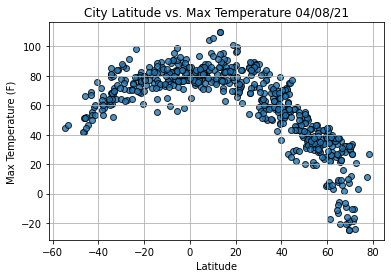

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

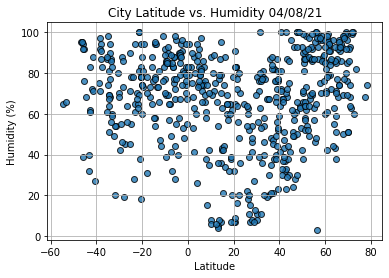

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

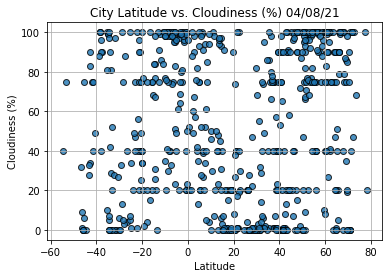

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

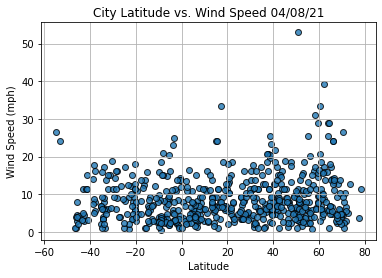

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
#IMPORT linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r="r= "+str (round(r_value,3))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-04-08 17:02:12
Lat                      -46.1927
Lng                       168.864
Max Temp                    42.01
Humidity                       95
Cloudiness                      9
Wind Speed                   1.01
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
578    False
579     True
580     True
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Torbay,CA,2021-04-08 17:02:09,47.6666,-52.7314,43.00,100,90,18.41
3,Saskylakh,RU,2021-04-08 17:02:09,71.9167,114.0833,-10.23,99,100,6.51
4,Fairbanks,US,2021-04-08 17:00:18,64.8378,-147.7164,8.01,85,90,6.91
5,Jamestown,US,2021-04-08 16:57:39,42.0970,-79.2353,71.60,43,1,9.22
6,Marzuq,YE,2021-04-08 17:02:10,14.4000,46.4667,71.42,36,6,6.85


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

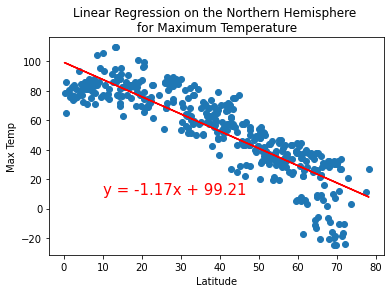

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(10,10))


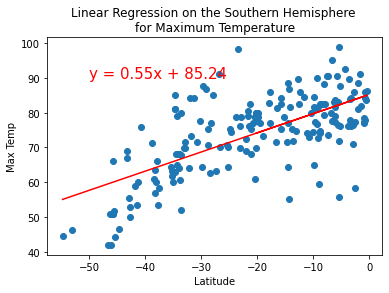

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))


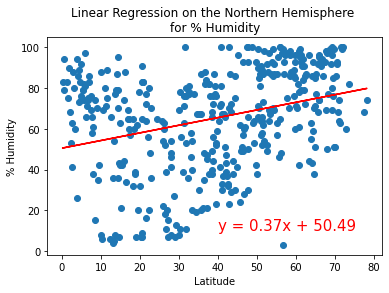

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))


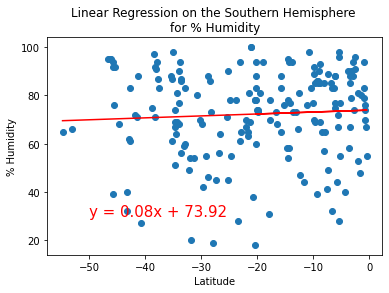

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,30))

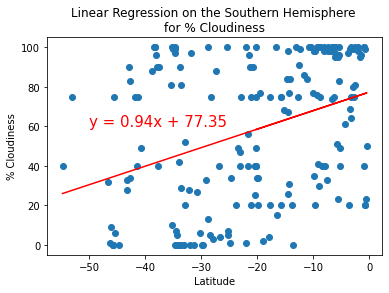

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

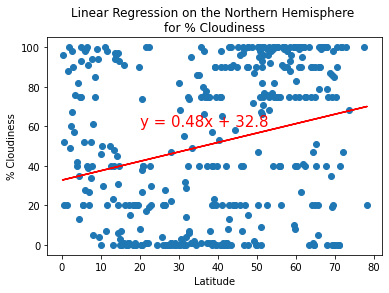

In [30]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(20,60))

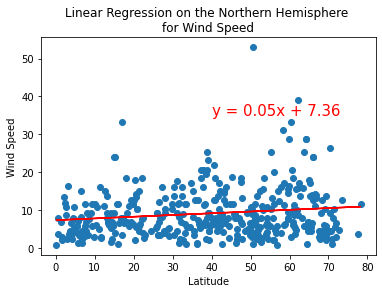

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

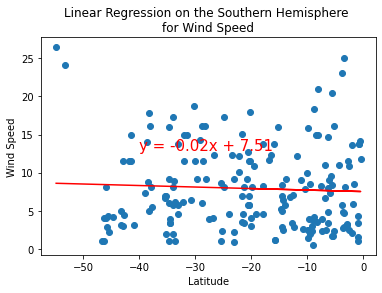

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-40,13))